# The Guts of a Supervised Learning Algorithm

If a supervised learning model is a function, then all we have to do to "learn" a good model is try every possible function and pick the one that predicts best. In other words, it's not really a problem of *building* a model, it's a problem of *finding* it. 

Let's look at an example. We're going to try and predict the average price of a house in a neighborhood in Boston based on the student/teacher ratio in that neighborhood's school district. Our data look like this:

In [10]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd

boston = load_boston()
bos = pd.DataFrame(boston.data, columns=boston.feature_names)
bos['PRICE'] = boston.target

`PTRIATIO` stands for pupil-teacher ratio, `PRICE` is the average house price (in thousands of dollars) 

In [7]:
bos[['PTRATIO','PRICE']]

,PTRATIO,PRICE
0,15.3,24.0
1,17.8,21.6
2,17.8,34.7
3,18.7,33.4
4,18.7,36.2
...,...,...
501,21.0,22.4
502,21.0,20.6
503,21.0,23.9
504,21.0,22.0


If we split this up into a (single-column) matrix $X$ and a vector $Y$ we have 

$$
X=
\left[
\begin{array}{c}
    15.3 \\ 17.8 \\ 17.8 \\ \vdots \\ 21.0
\end{array}
\right]
\quad
Y=
\left[
\begin{array}{c}
    24 \\ 21.6 \\ 34.7 \\ \vdots \\ 11.9
\end{array}
\right]
$$

In [107]:
X = np.array(bos.PTRATIO)
Y = np.array(bos.PRICE)

And since there is only one predictor (`PTRATIO`), we can easily visualize these data as a scatterplot. Each point here is one row of data (a neighborhood).

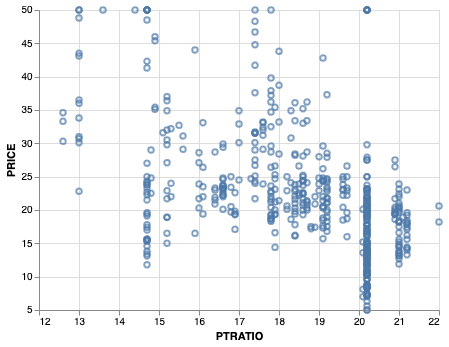

In [108]:
import altair as alt
alt.Chart(bos).mark_point().encode(
    x=alt.X('PTRATIO', scale=alt.Scale(zero=False)),
    y=alt.Y('PRICE', scale=alt.Scale(zero=False))
)

We're looking for a function so that $y \approx f(x)$. There are an infinite number of functions we could use as a model, but for the sake of argument, let's assume there are only these three possibilites, which we've plotted as lines over our scatterplot:

* model A: $f_A(x) = 20$
* model B: $f_B(x) = 60 - 2x + 2\sin(x)$
* model C: $f_C(x) = 1 + 2x - \frac{1}{3}(x-20)^2$


In [109]:
F = {
    'A': lambda x: 0*x + 20,
    'B': lambda x: -2*x + 60 + 2*np.sin(x),
    'C': lambda x: 2*x + 1 + -((x-20)**2)/3
}

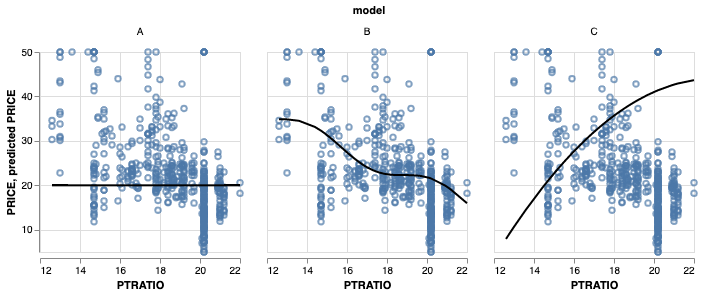

In [110]:
for m, f in F.items():
    bos[m] = f(np.array(bos.PTRATIO))
    
bos_melted = bos[['PRICE', 'PTRATIO'] + list(F.keys())].melt(
    id_vars = ['PRICE', 'PTRATIO'], 
    value_vars = F.keys(),
    var_name = 'model',
    value_name = 'predicted PRICE'
)

cht = alt.Chart(bos_melted, height=200, width=200)

points = cht.mark_point().encode(
    x=alt.X('PTRATIO', scale=alt.Scale(zero=False)),
    y=alt.Y('PRICE', scale=alt.Scale(zero=False))
)

lines = cht.mark_line(color = 'black').encode(
    x=alt.X('PTRATIO', scale=alt.Scale(zero=False)),
    y=alt.Y('predicted PRICE', scale=alt.Scale(zero=False))
)

(points + lines).facet('model')

We'll call the set $\mathcal F = \{f_A, f_B, f_C\}$ our *model space*. A model space is nothing more a collection of functions that we will consider as candidate models. Every supervised learning algorithm has a model space, whether implicit or explicit.

If these were the only three functions in the world, "fitting" a supervised learning model would just be a question of determining which of these three is the best model. Which begs the question: what do we mean by "best"? Using the naked eye, it looks like model B "fits" the data the best out of these three, but we need to come up with an objective way to judge fit. In other words, we need to come up with a function that takes a model and the data as inputs and returns a single number that quantifies how well the model fits the data. We'll call that function a *loss* function, since it will measure, in a sense, how much we "lose" by using a particular model. The loss is sometimes also called the *criterion* or *objective*. Here's an example of a loss function, notated mathematically and also in code:

$$
L(f, X, Y) = \frac{1}{n}\sum_i |y_i - f(x_i)|
$$

In [111]:
def loss(f, X, Y):
    return np.sum(np.abs(Y - f(X)))/len(Y)

The quantity $y_i - f(x_i)$ captures the discrepancy between what the model predicts ($f(x_i)$) and what was truly observed ($y_i$). 

* residual plot

* evaluate loss of these three models = optimization algorithm

In [112]:
loss(F['A'], X, Y)

6.617786561264822